### LORENZ TEST

In [1]:
import importlib
import json
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

from model import ESNModel
import utils
from utils import integration_lorenz


In [2]:
config_path = "lorenz.config"  # FIXME: Maybe use YAML? If you want hard-typed config, use pydantic
with open(config_path) as config_file:
    config = json.load(config_file, object_pairs_hook=OrderedDict)

In [3]:
# Generate data
# TODO: Maybe make a cached data file
data, time = integration_lorenz(
    epoch=config["system"]["length"],
    delta_t=config["system"]["d_t"]
)
print(f"{data.shape=}")

data.shape=(20000, 4)


In [4]:
import model
importlib.reload(model)

RC_lorenz = ESNModel(config)
loss, loss_before_training,subtrained = RC_lorenz.training(data,qualification = 10)
print(f"{loss_before_training=:.04f}")
print(f"{loss=:.04f}")

/home/bfish/projects/reservoir/model.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather t

loss_before_training=156.0733
loss=0.0139


In [5]:
output_lorenz,subsamples_lorenz = RC_lorenz.run(data,RC_lorenz.training_time,RC_lorenz.run_time-RC_lorenz.training_time)
#forced_output_lorenz, _ = RC_lorenz.run_with_input()

/home/bfish/projects/reservoir/model.py:150: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prev_state, torch.tensor(output)


/tmp/ipykernel_31025/3710537101.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output_lorenz),


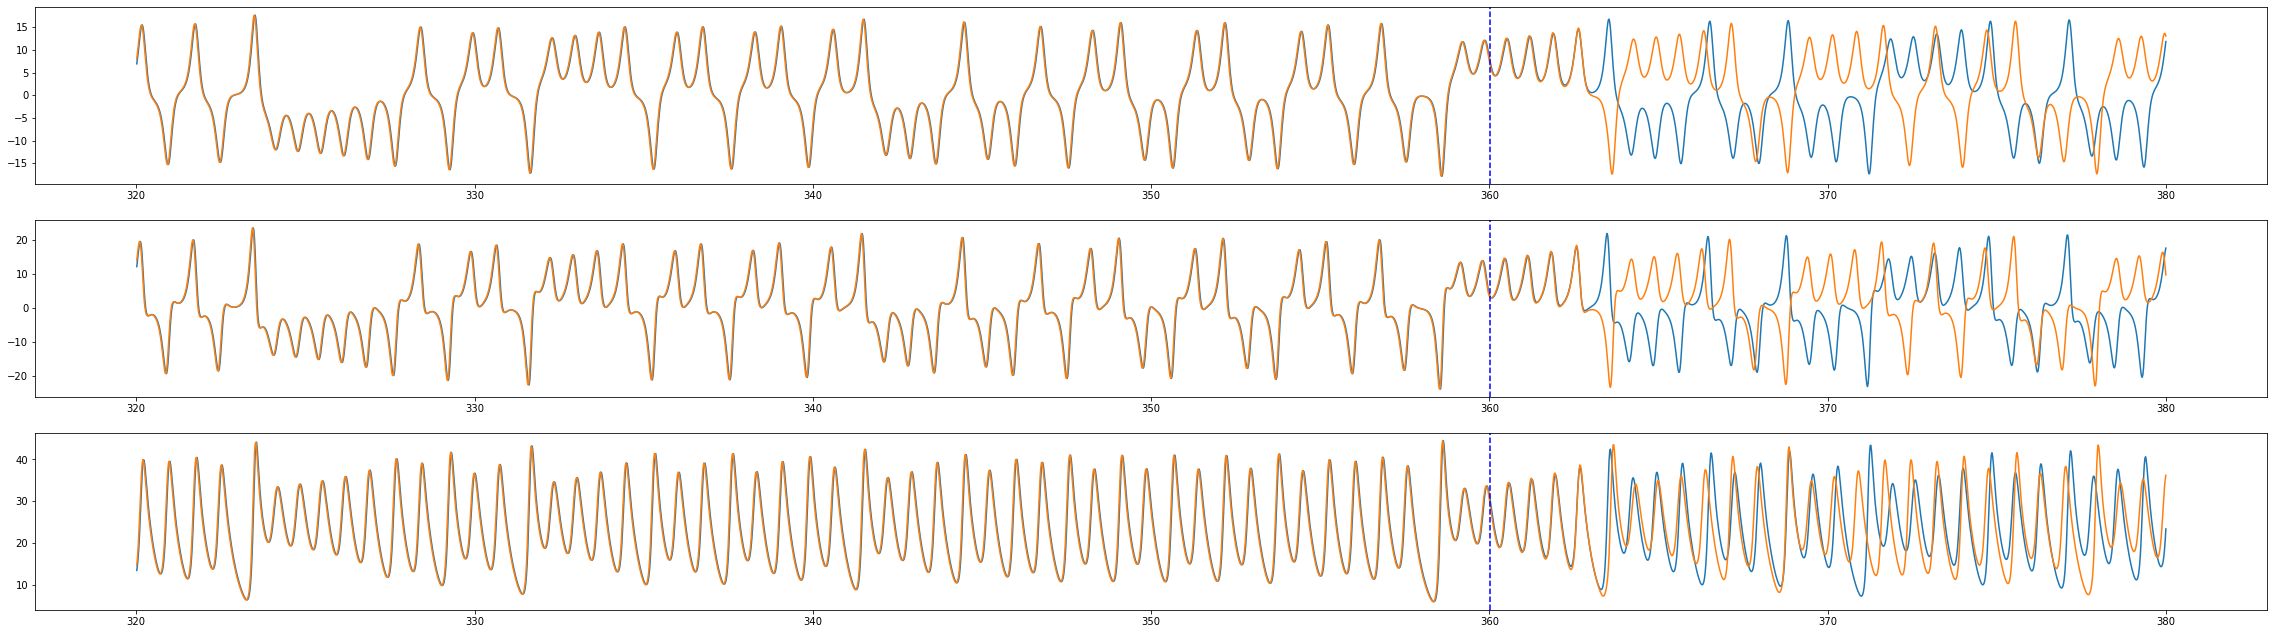

In [6]:
import torch
import numpy as np
import importlib
import utils

importlib.reload(utils)
# utils.plot_time_sequence(RC_lorenz.training_time,RC_lorenz.training_time+1000,RC_lorenz.training_time,RC_lorenz.f,torch.tensor(output_lorenz),torch.tensor(lorenz).T,time,3)
lorenz_time = np.linspace(0, RC_lorenz.run_time * RC_lorenz.d_t, RC_lorenz.run_time)

utils.plot_time_sequence(
    RC_lorenz.training_time - 2000,
    RC_lorenz.training_time + 1000,
    RC_lorenz.training_time,
    torch.tensor(output_lorenz),
    torch.tensor(data),
    lorenz_time,
    3,
)

/home/bfish/projects/reservoir/model.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather t

[1.8772193314151004, 1.879830204743123, 1.8800577514613714, 1.8805179987110108, 1.8805746588846994, 1.8810941359980184, 1.8809162149509497, 1.8810975690918426, 1.880993878972519, 1.8821969605030027]


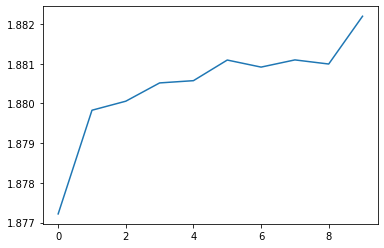

In [7]:
import qualification
importlib.reload(qualification)
loss_list = qualification.learning_curve(subtrained,test_length = 2000,data=data[len(data)-2000:])
print(loss_list)
plt.plot(range(10),loss_list)

In [9]:
importlib.reload(qualification)
importlib.reload(utils)
lamda_model = qualification.lyapunov_estimate(RC_lorenz,data[0],delta_naught = 0.5,tests=20,measure_time=500,dimension = 4)
lamda_system = utils.system_lyapunov(dimension = 3, params = (10, 28, 8 / 3), tests = 20, init = (25,25,25))
print(lamda_model,lamda_system)



/home/bfish/projects/reservoir/model.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather t

0.006519533393278577 0.01542303343306809


In [17]:
importlib.reload(qualification)
KR,GR,MC = qualification.config_space(RC_lorenz,tests = 1)
print(KR,GR,MC)

20
---
20
20.0 20.0 0


### MACKEY-GLASS TEST

In [ ]:

config_path = "mackey_glass.config"
with open(config_path) as config_file:
    config = json.load(config_file, object_pairs_hook=OrderedDict)

In [ ]:
# Generate data
# TODO: Maybe make a cached data file
data_mg, time_mg = utils.discrete_mackey_glass(
    epoch=config["system"]["length"],
    delta_t=config["system"]["d_t"]
)
print(f"{data_mg.shape=}")

In [ ]:
importlib.reload(utils)

RC_mg = ESNModel(config)
loss, loss_before_training = RC_mg.training(data_mg)
print(f"{loss_before_training=:.04f}")
print(f"{loss=:.04f}")

In [ ]:
output_mg,_ = RC_mg.run(data_mg,RC_mg.training_time,RC_mg.run_time-RC_mg.training_time)

In [ ]:
import torch
import numpy as np
import importlib
import utils
mg_time = np.linspace(0, RC_mg.run_time * RC_mg.d_t, RC_mg.run_time)
importlib.reload(utils)
# plot of train-and-auto-run
utils.plot_time_sequence(
    RC_mg.training_time - 2000,
    RC_mg.training_time + 2000,
    RC_mg.training_time,
    torch.tensor(output_mg),
    torch.tensor(data_mg),
    mg_time,
    1,
)



# utils.plot_time_sequence(0,RC.run_time,RC.f,p,s,time,1)